<img src='new_img/odsc.png'>


## Julia Lintern
####  Senior Data Scientist @ [Metis](thisismetis.com)

####  09/21/2018

#####  Please connect with me on [LinkedIn](www.linkedin.com/in/julia-lintern-a5141384)  and [github](https://github.com/julialintern)

#   Keeping up with the Deep-Learning Curve via Keras

<img src='new_img/entree.png' align='middle'/>

# Nerual Net Intro

<img src='new_img/neuron1.png' align='middle'/>

<img src='new_img/neuron2.png' align='middle'/>


Populating the interactive namespace from numpy and matplotlib


Text(0.5,1,'Cutest Cat')

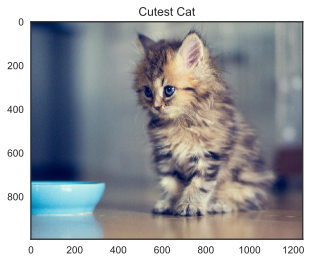

In [9]:
% pylab inline
% config InlineBackend.figure_format = 'svg'

from scipy import ndimage
img=plt.imread('new_img/cutest.jpg')
plt.imshow(img);
plt.title('Cutest Cat')

In [2]:
# our image as array 
print(img.shape)
print('\n')
# printing first channel of RGB image
print(img[:,:,0])

(995, 1244, 3)


[[  4   4   4 ..., 145 146 146]
 [  4   4   3 ..., 145 146 146]
 [  4   4   3 ..., 147 148 148]
 ..., 
 [126 127 128 ..., 141 142 143]
 [125 126 127 ..., 136 137 138]
 [124 125 126 ..., 139 140 141]]


<img src='new_img/title.png'/>
<img src='new_img/matrix3.png'/>



<img src='new_img/cross_ent.png'>


$$ Softmax:   f_j(z)={{{e^{z_j}}\above 1pt\sum_k e^{z_k}}}$$

$$ Cross Entropy:   L_i= -\sum_j t_j log(f_j(z))$$      
             ( Cross Entropy ~ Negative log probability for the correct label)


<img src='new_img/mnist.png'/>

$$W_{1,1}x_1 + W_{1,2}x_2 + W_{1,3}x_3  + b_1     =    y_1$$
$$W_{2,1}x_1 + W_{2,2}x_2 + W_{2,3}x_3  + b_2     =    y_2$$
$$W_{3,1}x_1 + W_{3,2}x_2 + W_{3,3}x_3  + b_3     =    y_3$$

$$  ....  $$ 
$$  ....  $$

<img src='new_img/mnist2.png'/>

<img src='new_img/mnist_wt.png' align='middle'/>

<img src='new_img/deep.png' align='middle'/>
<img src='new_img/layers.png' align='middle'/>

<img src='new_img/xor.png' align='middle'/>

<img src='new_img/xor2.png'/>

<img src='new_img/convex.png'/>

<img src='new_img/non_convex.png'/>

<img src='new_img/backprop_new.png'/>




Let's focus on **w5**.   How can we update this weight?

$$net_{o1}= h_{1}*w_5 + h_2*w_6+b$$  

$$out_{o1}= {{1}\above 1pt (1+e^{-net_{o1}})}$$

$$E_{total}= 1/2\sum(target-out)^2$$

How do we calculate : $${dE_{total}\above 1pt dw_5} ?$$ 



$${dE_{total}\above 1pt dout_{o1}}=2*1/2(target_{o1}-out_{o1})$$

$${dout_{o1}\above 1pt dnet_{o1}}=out_{o1}*(1-out{o1})$$

$${dnet_{o1}\above 1pt dw_{5}}=h_{1}$$


$${dE_{total}\above 1pt dw_5} = {dE_{total}\above 1pt dout_{o1}}{dout_{o1}\above 1pt dnet_{o1}}{dnet_{o1}\above 1pt dw_{5}}$$ 

<h1><center><font color='#F87217'> KERAS  </font></center></h1>

<h4><center><font color='black'> High-Level Deep Learning Library for Theano & Tensorflow  </font></center></h4>
 


Keras was developed to allow for fast deep-learning prototyping through the use of: 
 - high-level building blocks for deep-learning 
 - run on CPU or GPU
 
 
Backends: Tensorflow,Theano, CNTK 

  - Tensorflow is the recommended backend (and the default)
  - We will start with TensorFlow today !

In [28]:
import warnings
warnings.filterwarnings('ignore')

import keras
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Input
from keras.optimizers import SGD, RMSprop, Adam
from keras.utils.vis_utils import model_to_dot, plot_model
from keras.utils.np_utils import to_categorical

from IPython.display import SVG
import seaborn as sns

import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 2000)

% pylab inline
% config InlineBackend.figure_format = 'svg'

Populating the interactive namespace from numpy and matplotlib


### Let's get some data

In [13]:
sns.set_style('white')

iris=datasets.load_iris()
X=iris.data
y=iris.target

data=pd.DataFrame(X)
data['target']=y

In [14]:
data['name']=data.target.astype('str').replace({'0':'setosa','1':'versicolor','2':'virginica'})

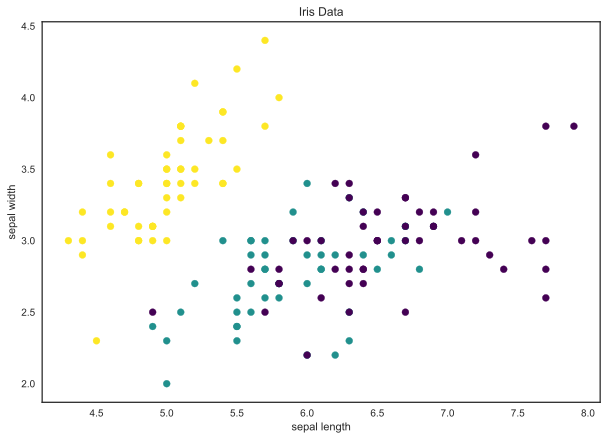

In [15]:
# let's generate a quick plot of our data
plt.figure(figsize=(10,7));
plt.scatter(X[:,0],X[:,1],c=y,cmap='viridis_r')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('Iris Data');

## `Keras` Models
- The core objects in `Keras` are `Models` and `Layers`
- `Models` set up the container for your network
- `Layers` fill in the architecture (connections, unit types, activation functions, etc)
- The 2 options for `Models`:
  - `Sequential`: The basic one we'll start with  
  - Function API: Specify complex models
  
### The Sequential Model
Allows you to stack all sorts of layers in your network

##  Let's create our first Model

In [33]:
model=Sequential()  
model.add(Dense(units=3,input_dim=4))  # output: # classes,input: # of features
model.add(Activation("softmax"))

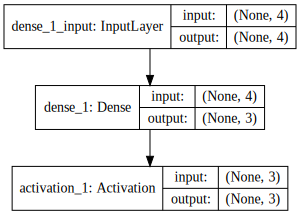

In [17]:
SVG(model_to_dot(model,show_shapes=True).create(prog='dot',format='svg'))

In [18]:
# encode class values to integers
encoder=LabelEncoder()
encoder.fit(y)
enc_y=encoder.transform(y)
# one hot encode the integers
one_hot_y=to_categorical(enc_y)
one_hot_y[:5]

array([[ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.]])

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, one_hot_y, test_size=0.33, random_state=123)

# compile: need to specify our loss function, optimizer & metric
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test),batch_size=32)

Train on 100 samples, validate on 50 samples
Epoch 1/10
100/100 [==============================] - 0s 2ms/step - loss: 4.1169 - acc: 0.3000 - val_loss: 2.2619 - val_acc: 0.4000
Epoch 2/10
100/100 [==============================] - 0s 649us/step - loss: 2.2185 - acc: 0.2700 - val_loss: 1.3324 - val_acc: 0.0600
Epoch 3/10
100/100 [==============================] - 0s 183us/step - loss: 1.3366 - acc: 0.0900 - val_loss: 1.1445 - val_acc: 0.3800
Epoch 4/10
100/100 [==============================] - 0s 147us/step - loss: 1.0846 - acc: 0.4600 - val_loss: 1.1342 - val_acc: 0.5200
Epoch 5/10
100/100 [==============================] - 0s 350us/step - loss: 1.0375 - acc: 0.6200 - val_loss: 1.0770 - val_acc: 0.5000
Epoch 6/10
100/100 [==============================] - 0s 261us/step - loss: 1.0096 - acc: 0.6100 - val_loss: 1.0491 - val_acc: 0.5000
Epoch 7/10
100/100 [==============================] - 0s 158us/step - loss: 0.9827 - acc: 0.6000 - val_loss: 1.0665 - val_acc: 0.5800
Epoch 8/10
100/100 

###  So wait, what did we just do ?


### Let's try it again..

In [36]:
# take two! 
model=Sequential()   
model.add(Dense(units=64,input_dim=4))  # Note: we are making our network wider,
model.add(Activation("relu"))
model.add(Dense(units=32)) # We are making our network longer :)
model.add(Activation("relu"))
model.add(Dense(units=3))
model.add(Activation("softmax"))

In [37]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

# adding early stopping (monitors val_loss)
cb=keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto')
fit=model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test),batch_size=32,callbacks=[cb])

Train on 100 samples, validate on 50 samples
Epoch 1/10
100/100 [==============================] - 1s 7ms/step - loss: 1.3646 - acc: 0.3900 - val_loss: 1.2752 - val_acc: 0.2200
Epoch 2/10
100/100 [==============================] - 0s 280us/step - loss: 0.9939 - acc: 0.4000 - val_loss: 0.9346 - val_acc: 0.5600
Epoch 3/10
100/100 [==============================] - 0s 211us/step - loss: 0.9037 - acc: 0.7200 - val_loss: 0.8212 - val_acc: 0.7800
Epoch 4/10
100/100 [==============================] - 0s 232us/step - loss: 0.9057 - acc: 0.6100 - val_loss: 0.7675 - val_acc: 0.7800
Epoch 5/10
100/100 [==============================] - 0s 264us/step - loss: 0.8828 - acc: 0.6100 - val_loss: 0.7185 - val_acc: 0.7800
Epoch 6/10
100/100 [==============================] - 0s 216us/step - loss: 0.8097 - acc: 0.6200 - val_loss: 0.6781 - val_acc: 0.8800
Epoch 7/10
100/100 [==============================] - 0s 268us/step - loss: 0.7236 - acc: 0.8800 - val_loss: 0.6603 - val_acc: 0.9600
Epoch 8/10
100/100 

In [23]:
print(fit.history)

{'val_loss': [1.003830394744873, 0.90928611755371092, 0.88257891654968257, 0.86520735025405882, 0.82111414194107057, 0.80189818382263178, 0.7695085692405701, 0.7133618021011352, 0.67167703390121458, 0.63164172649383543], 'val_acc': [0.26000000178813937, 0.77999999523162844, 0.88000000238418574, 0.62000000715255732, 0.70000000476837154, 0.62000000715255732, 0.62000000715255732, 0.71999999284744265, 0.80000000238418578, 0.88000000238418574], 'loss': [1.0419675064086915, 0.97881588697433475, 0.93187112569808961, 0.87943282127380373, 0.83385544538497924, 0.79332690000534056, 0.76391774654388422, 0.73095933914184574, 0.69650645256042476, 0.66801429748535157], 'acc': [0.39000000000000001, 0.40000000000000002, 0.60999999999999999, 0.80000000000000004, 0.71999999999999997, 0.76000000000000001, 0.69999999999999996, 0.71999999999999997, 0.80000000000000004, 0.89000000000000001]}


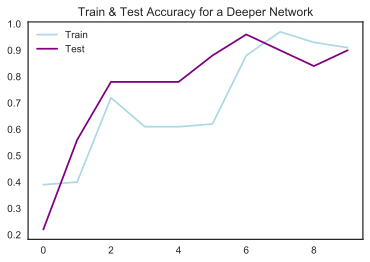

In [38]:
# lot's plot our history

plt.plot(range(10),fit.history['acc'],c='lightblue',marker='+',label='Train')
plt.plot(range(10),fit.history['val_acc'],c='purple',marker='+',label='Test')
plt.legend()
plt.title('Train & Test Accuracy for a Deeper Network');

###  What can be gained by making the network wider & deeper?   

 -  A sufficiently wide neural net can approximate any reasonable function
 -  A deep network can be quite good at generalization
 
 <img src='new_img/VGG.png'/>

##  Code-Along
#### Objective: 
- Continue working with the Iris dataset, build another model that improves the accuracy further.
- Experiment with differnt [optimizers!](https://keras.io/optimizers/)
- Try to get > .95 accuracy.

In [ ]:
# Enter your code here

###  Game-Changers for Deep-Learning
 - hardware & data 


Until late 2000s, we were still missing reliable ways to train deep neural nets (as a result networks were still very shallow)  Key issue: gradient propagation : key signal would fade away as we added layers
This changes around 2009 with the introduction of several key improvements :
- Better activation functions
- Better weight initialization schemes (we'll stick with the default initializer [glorot uniform](keras.initializers.glorot_uniform(seed=None)
- Better optimization techniques, such as [rmsProp & adam](https://keras.io/optimizers/)
                                                                                

 ## A word about optimization: 
 
**momentum**:    
Idea is exponential weighted average of updates :    
$V_t=\beta*V_{t-1}+ (1-\beta)*d\theta$   
$\theta=\theta -(\alpha)V_t$

$\beta  =~ .9$


<img src='new_img/momentum.png'>


**rmsprop**: 

$S_t=\beta*S_{t-1}+ (1-\beta)*d\theta^2$  
$\theta=\theta -\alpha(d\theta)/\sqrt(S_t)$

idea: if $V_t$ is a relatively large # (think large oscillation) 
then we're updating theta with a smaller # --> (damp out osciallations) 

**adam**   
A combination of momentum & rmsprop   
$\theta=\theta -\alpha(V_t)/\sqrt(S_t)$
